## Лабораторна робота 2. Ймовірнісні та геометричні методи виявлення аномалій
У даній частині лабораторної роботи з виявлення аномалій ми дізнаємося, що аналіз екстремальних значень можна використовувати для оцінки ймовірності виникнення рідкісної події. Ми також обговорили виявлення аномалій на основі кута та глибини. Незважаючи на те, що ці три підходи відрізняються, вони мають одну особливість: вони припускають, що аномалії знаходяться на межі (або краю чи хвості) даних.

Тут буде застосовано аналіз екстремальних значень, щоб краще зрозуміти рідкісні події в рівнях озону в атмосфері (однофакторні дані). Ми також будемо використовувати виявлення аномалій на основі кута та глибини, щоб знаходити аномалії в багатовимірних даних.

Ви повинні отримати:

- розуміння аналізу екстремальних значень;

- практичний досвід виявлення аномалій на основі кута;

- практичний досвід виявлення аномалій на основі глибини.
#### Імпорт

In [2]:
%matplotlib inline

import sys
import datetime
import scipy
import scipy.stats as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random

# Розділ 1: Аналіз екстремальних значень¶
У цьому розділі ми використовуємо аналіз екстремальних значень, щоб виявити аномалії в реальних даних: рівні озону в районі Нью-Йорка. Поблизу рівня землі озон є небезпечним для органів дихання, оскільки він може пошкодити слизові оболонки та тканини дихальних шляхів. Індекс якості повітря **air quality index** (AQI) для озону — це шкала від 0 до 500, яка описує рівень забруднення озоном: чим вище число, тим більша небезпека. Детальніше про шкалу можна дізнатися тут:

https://www.airnow.gov/aqi/aqi-basics

Рівні AQI озону для столичного району Нью-Йорка взяті з веб-сайту Агентства з охорони навколишнього середовища США:

https://www.epa.gov/outdoor-air-quality-data/air-quality-index-daily-values-report

(Географічною зоною є "Нью-Йорк-Ньюарк-Джерсі-Сіті")

Було вибрано всі доступні повні роки (1980-2017), а дані за всі роки об’єднано в один файл CSV.

Завантажте дані як фрейм даних pandas і подивіться на них.

In [3]:
ozone_aqi = pd.read_csv('aqidailyozone.csv', 
                        index_col=0, 
                        parse_dates=True) 
ozone_aqi.info()

C:\Users\bohda\AppData\Local\Temp\ipykernel_6884\1379223912.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ozone_aqi = pd.read_csv('aqidailyozone.csv',


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13880 entries, 1980-01-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Ozone AQI Value  13880 non-null  int64
dtypes: int64(1)
memory usage: 216.9 KB


In [4]:
ozone_aqi.head()

,Ozone AQI Value
Date,
1980-01-01,19
1980-01-02,16
1980-01-03,19
1980-01-04,17
1980-01-05,23


##### Виконаємо дві швидкі перевірки даних. Спочатку знайдіть відсутні значення.

In [5]:
ozone_aqi.isnull().values.any() # пошук відсутніх даних

np.False_

Добре. Немає пропущених значень. 

По-друге, переконайтеся, що кількість рядків дорівнює кількості днів з 1/1/80 до 12/31/17 (включно).

In [6]:
d0 = datetime.date(1980, 1, 1)
d1 = datetime.date(2017, 12, 31)
difference = d1 - d0
# Last day is not included in the difference, so add one to account for it
print('Number of days is {}'.format(difference.days+1))
print('Number of rows is {}'.format(ozone_aqi.shape[0]))

Number of days is 13880
Number of rows is 13880


Знову добре.

Примітка: в принципі ми також повинні перевірити, чи дані є стаціонарними, але такі перевірки виходять за рамки цього заняття (тест перевірки на стаціонарність часового ряду).

Тепер ми можемо приступити до аналізу даних. Як ми обговорювали в лекції, існує два основні підходи до аналізу екстремальних значень:

а) блокові максимуми

б) пік над порогом.

Ми перевіримо наші дані за допомогою обох підходів.

### Секція 1а: Блок Максима
Ми почнемо з блокових максимумів. Першим кроком є створення ряду річних максимумів **annual maxima series** (AMS), який складається з максимального значення AQI озону для кожного року. Ми витягуємо AMS із щоденних даних.

In [7]:
year_grouper = pd.Grouper(freq='A') #групування за параметром "рік"
ams = ozone_aqi.groupby(year_grouper).max() #пошук максимального значення в групах
print(ams)
print('')
print('Number of AMS entries is {}'.format(len(ams)))

            Ozone AQI Value
Date                       
1980-12-31              278
1981-12-31              279
1982-12-31              248
1983-12-31              276
1984-12-31              251
1985-12-31              249
1986-12-31              236
1987-12-31              262
1988-12-31              266
1989-12-31              220
1990-12-31              244
1991-12-31              241
1992-12-31              222
1993-12-31              247
1994-12-31              225
1995-12-31              244
1996-12-31              215
1997-12-31              247
1998-12-31              218
1999-12-31              232
2000-12-31              227
2001-12-31              218
2002-12-31              236
2003-12-31              226
2004-12-31              201
2005-12-31              217
2006-12-31              226
2007-12-31              195
2008-12-31              201
2009-12-31              151
2010-12-31              208
2011-12-31              209
2012-12-31              174
2013-12-31          

C:\Users\bohda\AppData\Local\Temp\ipykernel_6884\3665941234.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_grouper = pd.Grouper(freq='A') #групування за параметром "рік"


AMS має 38 записів, як і очікувалося.

**ПРИМІТКА.** Групування за максимумом також дає максимум в індексі (тобто датою завжди є 31 грудня, оскільки це максимальна дата). Ці два максимуми беруться незалежно, ми _не_ просто отримуємо AQI 31 грудня.

#### Підберіть AMS до узагальненого розподілу екстремальних значень (GEV). Ми будемо використовувати статистичні функції в scipy.stats.

In [8]:
fit = ss.genextreme.fit(ams)
print(fit)

(np.float64(0.48070190276858693), np.float64(212.9835530676018), np.float64(36.562050718746406))


Це параметри форми 𝜉, розташування $\mu$ та масштабу $\sigma$ відповідно.

Примітка: параметр форми 𝜉, який використовується в scipy, має знак, протилежний тому, який використовується в більшості інших довідкових джерел і програмних пакетів. Дивись в:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html#scipy.stats.genextreme

і

https://github.com/scipy/scipy/issues/3844

Іншими словами, параметр форми scipy, який позначається як c = -𝜉, параметр форми, який ми використовували в лекції 2.
Тут 𝜉 = -с= -0,48 < 0.

Побудуйте гістограму даних і підгонку.

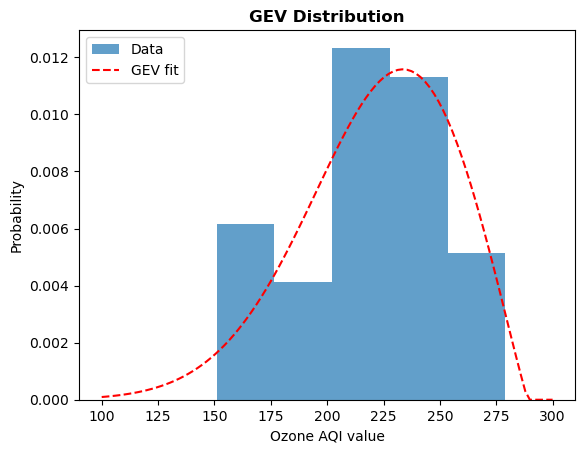

In [9]:
plt.hist(ams.iloc[:,0], bins=5, density=True, alpha=0.7, label='Data')
plt.plot(np.linspace(100, 300, 100),
         ss.genextreme.pdf(np.linspace(100, 300, 100), fit[0], fit[1], fit[2]), 'r--',
         label='GEV fit') #побудова графіка функції густини розподілу GEV
plt.title('GEV Distribution', fontweight='bold')
plt.xlabel('Ozone AQI value')
plt.ylabel('Probability')
plt.legend(loc='upper left')
plt.show()

Підгонка відображає загальну тенденцію, але вона не дуже точна, як видно на око. (Подальший статистичний аналіз якості підгонки виходить за рамки цього уроку.)

**Питання**: яка одна з причин проблем із підгонкою?

**Відповідь**: Однією з причин є малий набір даних (38 точок). Ми також повинні бути обережними, як ми збираємо дані для гістограми. Спробуйте різні значення *bins* і подивіться, що станеться.

Незважаючи на проблеми, ми все ще можемо поставити запитання, які стосуються здоров’я людини. Наприклад, яка ймовірність перевищення AQI 200 у певному році? (Рівень озону вище 200 вважається дуже нездоровим.)

Щоб відповісти на це питання, обчисліть кумулятивну функцію розподілу (CDF).

In [10]:
prob_over_200 = (1.0 - ss.genextreme.cdf(200, fit[0], fit[1], fit[2]))
print('{:.2f}'.format(prob_over_200))

0.75


Ми також можемо бути стурбовані тим, наскільки погані рідкісні події. Наприклад, яка ймовірність перевищення AQI озону в один відсоток у певний рік? Це те саме, що запитувати AQI, при якому CDF становить 0,99. Щоб відповісти на це запитання, ми можемо використати _обернену_ функцію CDF, яка називається *percent point function* (PPF).

Більш детально:
> "Запитання: при якому значенні X  CDF(X) = 0,99?"
>
> "Відповідь: PPF(0,99)"

In [11]:
boundary = ss.genextreme.ppf(0.99, fit[0], fit[1], fit[2])
print(f'The one precent threshold ozone AQI level is {boundary:6.4f}')

The one precent threshold ozone AQI level is 280.7103


### Розділ 1b: Пікове перевищення порогу
Що робити, якщо вас не цікавлять максимуми в конкретних блоках, але ви хочете знати про перевищення порогу в більш загальному плані? Наприклад, у випадку озону перевищення може відбуватися кілька разів на рік або взагалі не відбуватися протягом певного року. Для таких сценаріїв більш доцільним є підхід максимального порогу *peak of threshold* (POT).

Давайте розглянемо всі дані про озон у вигляді гістограми.

In [12]:
ozone_aqi['Ozone AQI Value'].hist();

Ми зауважимо, що більшість даних є нижчими за AQI 100, що вважається помірною або хорошою якістю повітря. (Ой!) Ми стурбовані високим хвостом AQI, який може бути небезпечним для здоров’я. Як ми обговорювали в лекції, цей хвіст повинен бути добре апроксимований універсальним розподілом.

Завдання вибору порога для хвоста вимагає певного судження. Якщо він занадто низький, то теореми про універсальну поведінку хвоста не застосовуються. Якщо він занадто високий, то в хвості буде мало точок даних, і кінцеві оцінки параметрів будуть поганими. Часто потрібно пробувати різні пороги та шукати добре (достатньо) відповідне.

Тут ми скористаємося зручним емпіричним правилом щодо того, з чого почати дослідження: візьміть найменше значення AMS.

In [13]:
min_max = ams.values.min()
print(f'Lowest maxima value for Ozone AQI in any year: {min_max}')

Lowest maxima value for Ozone AQI in any year: 151


#### Оскільки ми спробуємо різні значення порогу, визначте відповідну функцію для створення хвоста та побудуйте його графік.

In [14]:
def plot_tail(threshold):
    ozone_aqi_over_threshold = ozone_aqi[ozone_aqi['Ozone AQI Value'] > threshold]
    ozone_aqi_over_threshold.hist()

In [15]:
plot_tail(min_max)

Ми очікуємо, що хвіст буде спадною функцією рівня AQI озону, і тут ми бачимо плато від 170 до 210. Тому ми збільшимо поріг.

In [16]:
threshold = 200
ozone_aqi_threshold = ozone_aqi[ozone_aqi['Ozone AQI Value'] > threshold].iloc[:,0]
fit_expon = ss.expon.fit(ozone_aqi_threshold) #генерує параметри 𝜇 та 𝜎, відповідно, для експоненціального розподілу форми 𝑒𝑥𝑝[−(𝑥−𝜇)/𝜎
print(fit_expon)

(201.0, 15.779527559055111)


Це параметри розташування $\mu$ і масштабу $\sigma$ відповідно для експоненціального розподілу у вигляді $exp [-(x-\mu)/\sigma]$.

Побудуйте результати разом із експоненціальною підгонкою.

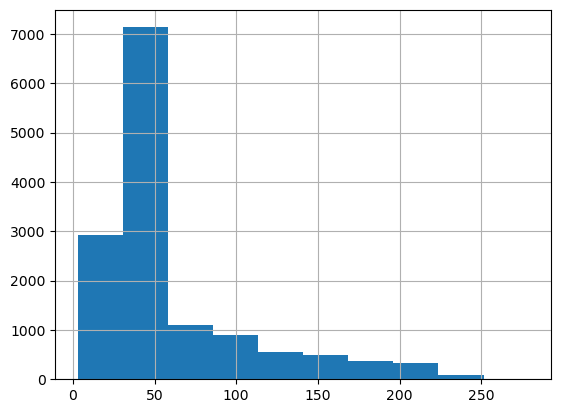

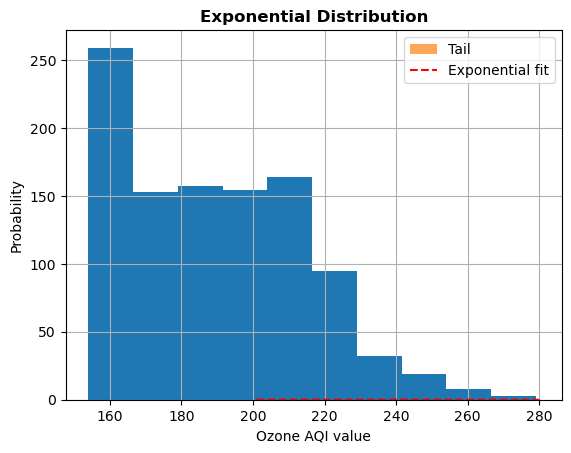

In [17]:
# linspace starts at 201 (one above threshold) to avoid fit going to zero, which looks ugly

plt.hist(ozone_aqi_threshold, bins=10, density=True, alpha=0.7, label='Tail')
plt.plot(np.linspace(201, 280, 100),
         ss.expon.pdf(np.linspace(201, 280, 100), fit_expon[0], fit_expon[1]), 'r--',
         label='Exponential fit')
plt.title('Exponential Distribution', fontweight='bold')
plt.xlabel('Ozone AQI value')
plt.ylabel('Probability')
plt.legend(loc='upper right')
plt.show()

Непогано. Вам слід повторити наведений вище аналіз із різними пороговими значеннями.

**Запитання:** як би ви вирішили, який поріг використовувати з усіх досліджених вами?

**Відповідь:** Один із способів вибору порогу – це той, який дає найменшу середню квадратичну помилку між даними та підгонкою.

Як і у випадку з блоковими максимумами, тепер ми можемо ставити запитання про різні результати. Давайте переглянемо запитання, які ми задавали раніше, і порівняємо відповіді.

#### A. Яка ймовірність перевищення AQI 200 протягом досліджуваного періоду часу (38 років)?
Тут відповідь 1,00, оскільки ми обираємо наш поріг 200.

Раніше ми виявили, що ймовірність перевищення 200 за певний рік становила 0,75. Таким чином, ймовірність перевищити 200 принаймні раз на 38 років становить $1 - (1 - 0,75)^{38} \approx 1,00$, що так само, як і вище.

#### B. Використовуючи підхід блокових максимумів, ми виявили, що AQI озону, який має одновідсоткову ймовірність бути перевищеним у певний рік, становить 281. 

Отже, ймовірність того, що цей рівень не буде перевищено протягом 38 років, становить $(1 - 0,01)^{38} \approx 0,68$.

Згідно з аналізом POT, ймовірність того, що рівень AQI 281 не буде перевищений протягом 38 років, визначається як

In [18]:
ss.expon.cdf(281, fit_expon[0], fit_expon[1])

np.float64(0.9937167020146207)

що значно вище, ніж оцінка блокових максимумів.

**Питання:** Чому є різниця?

 **Відповідь**: одна з причин пов’язана з формою GEV проти розподілу POT. Перший переходить до нуля при кінцевому значенні (289 у нашому випадку), а POT – ні. У результаті невеликі зміни в пороговому значенні AQI біля 289 мають великий вплив на ймовірність GEV, але не мають такого сильного впливу на ймовірність, отриману за POT.

Наприклад, порогове значення 0,1% GEV становить 287. Імовірність того, що цей рівень не буде перевищено протягом 38 років, становить $(1-0,001)^{38} \approx 0,96$.

Для POT та сама ймовірність становить 0,996, що близько до значення GEV.

Для повноти ми можемо зібрати дані з узагальненим розподілом Парето (GPD). Як ми обговорювали на лекціях, експоненціальний розподіл є окремим випадком GPD (параметр форми дорівнює нулю 𝜉=0).

In [19]:
fit2 = ss.genpareto.fit(ozone_aqi_threshold, 20, loc=201, scale=16)
print(fit2)

(np.float64(-0.06709510873892582), np.float64(200.99999967754965), np.float64(16.71263276563655))


Це параметри форми $\xi$, розташування $\mu$ і масштабу $\sigma$, відповідно, GPD. Зверніть увагу, що $\xi$ дуже близьке до нуля, що свідчить про те, що наш початковий підхід до використання експоненціального розподілу був доцільним.

Давайте подивимося на підгонку:

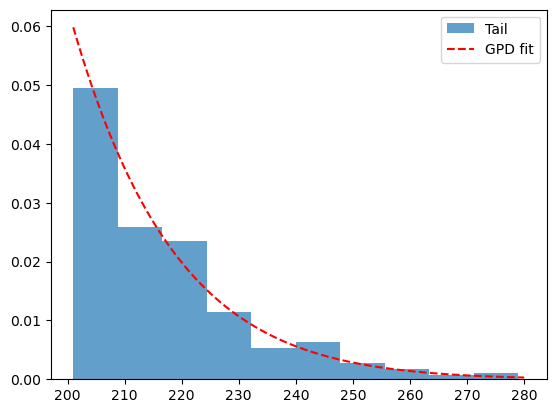

In [20]:
plt.hist(ozone_aqi_threshold, bins=10, density=True, alpha=0.7, label='Tail')
plt.plot(np.linspace(201, 280, 100),
         ss.genpareto.pdf(np.linspace(201, 280, 100), fit2[0], fit2[1], fit2[2]), 'r--',
         label='GPD fit')
plt.legend(loc='upper right')
plt.show()

Дуже схоже на те, що ми знайшли раніше для експоненціального розподілу.

**Примітка:** щоб GPD працював, нам потрібно вказати початкові припущення для всіх параметрів. Для параметрів розташування та масштабу ми вибрали значення, які ми знайшли для експоненціального розподілу. Спробуйте використовувати різні початкові припущення та подивіться, що ви отримаєте. Переконайтеся, що ви побудували графік відповідності та порівняли його з даними, щоб переконатися, що genpareto.fit дає прийнятний результат (іноді це не так).

# Розділ 2: Виявлення аномалії на основі кута


У цьому розділі ми використовуємо виявлення аномалій на основі кута для виявлення аномалій у змодельованих двовимірних даних. Нагадуємо, як працює виявлення аномалій на основі кута:

1. Виберіть точку в даних

2. Обчисліть усі кути, які ця точка утворює з іншими парами точок у даних

3. Обчисліть дисперсію цих кутів

4. Аномалії мають низьку дисперсію; нормальні точки мають високу дисперсію

Як правило, у вас є навчальні дані, де ви знаєте аномалії, і тому можете отримати порогове значення дисперсії. Точки, які нижчі порогового значення будемо класифікувати як аномалії. Потім ви застосовуєте цей поріг до своїх тестових даних.

Оскільки тут ми зосереджені на алгоритмі, а не на даних, ми не будемо проводити тестування/навчання. Замість цього ми будемо використовувати змодельовані дані, де знаємо аномалії та побачимо, наскільки добре працює алгоритм.

**Дані**

Ми починаємо зі створення даних, які будуть комбінацією нормальних точок і аномалій. Кожен набір точок (нормальних і аномальних) генерується з двовимірного розподілу Гауса, де ми вказуємо середнє значення в кожному вимірі, а також коваріаційну матрицю. Ми вибираємо нормальні дані як 100 точок, щільно згрупованих разом, тоді як аномалії – це 10 точок, які розташовані далі та поширені ширше.

In [21]:
np.random.seed(16) # При скиданні вихідного коду (кожного разу) щоразу з’являтиметься однаковий набір чисел.

# generate the normal data
normal_mean = np.array([1.0, 2.0]) 
normal_covariance = np.array([[0.2, 0.0], [0.0, 0.1]])
normal_data = np.random.multivariate_normal(normal_mean, normal_covariance, 100)

# generate the anomalous data
anomaly_mean = np.array([6.0, 8.0]) 
anomaly_covariance = np.array([[2.0, 0.0], [0.0, 4.0]])
anomaly_data = np.random.multivariate_normal(anomaly_mean, anomaly_covariance, 10)

# Примітка:
#
# Не плутайте два використання слова «нормальний»
# «Нормальний» у np.random.multivariate_normal відноситься до розподілу Гауса
# і не пов’язане з нормою чи аномалією
#

# Об’єднайте дані в один масив для подальшого використання
all_data = np.concatenate((normal_data, anomaly_data), axis=0)

**Побудуйте графік  нормальних і аномальних даних**

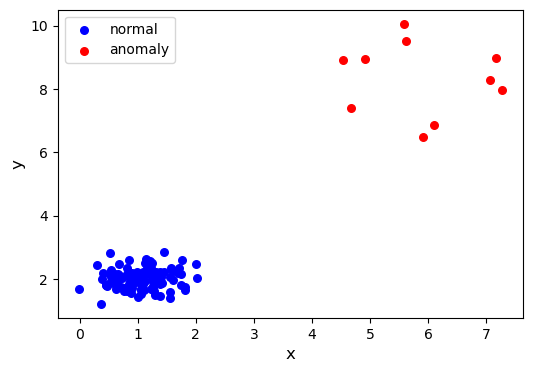

In [22]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)

ax1.scatter(normal_data[:,0], normal_data[:,1], s=30, c='b', marker="o", label='normal')
ax1.scatter(anomaly_data[:,0], anomaly_data[:,1], s=30, c='r', marker="o", label='anomaly')
plt.legend(loc='upper left');
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

### Алгоритм
Спочатку ми реалізуємо справжній алгоритм на основі кутів. Тобто ми обчислюємо фактичні кути для кожного набору з трьох точок у даних. Як ви побачите, цей алгоритм працює погано, що змушує нас розглянути альтернативу: зважене на відстані виявлення аномалії на основі кута, яке ми обговорювали на лекціях. У вправі 3 вас попросять реалізувати цей алгоритм, зважений на відстані, і перевірити, наскільки добре він визначає аномалії.

Ми починаємо з побудови двох ключових функцій для алгоритму виявлення аномалії на основі кута. Перша функція, angle, обчислює кут між трьома точками.

In [23]:
# Дано точки A, B і C, ця функція повертає гострий кут між векторами AB і AC
# використовуючи скалярний добуток між цими векторами

def angle(point1, point2, point3): 
    v21 = np.subtract(point2, point1)
    v31 = np.subtract(point3, point1)
    dot_product = (v21*v31).sum()
    normalization = np.linalg.norm(v21)*np.linalg.norm(v31)
    acute_angle = np.arccos(dot_product/normalization)
    return acute_angle

Друга функція, eval_angle_point, приймає два входи: точку та дані (набір точок). Ця функція повертає список кутів, які вхідна точка утворює з усіма парами точок у вхідних даних. Він використовує кут розрахунку кута.

Простий цикл через усі пари точок у даних недостатній, тому що ми повинні переконатися, що три точки ведуть до чітко визначених кутів без повторень. Точніше кажучи, якщо ми вибираємо точку A, а потім розглядаємо дві точки в даних B (друга точка) і C (третя точка), ми хочемо переконатися, що виконуються такі умови:

Точка В відрізняється від точки А
Точка C відрізняється від A і B
Ми не обчислюємо той самий кут двічі. Тобто, якщо ми обчислюємо кут між векторами AB і AC (де B — друга точка, а C — третя точка), ми не повторюємо обчислення з векторами AC і AB (де C — друга точка, а B — третій пункт).
Конструкції *if* в *eval_angle_point* забезпечують виконання трьох умов.

In [24]:
def eval_angle_point(point, data):
    angles_data = []
    for index_b, b in enumerate(data):
        if (np.array_equal(b, point)):
            continue
        # переконайтеся, що точка C йде пізніше в масиві, ніж точка B
         # щоб ми не рахували точки подвійно
        for c in data[index_b + 1:]:
            if (np.array_equal(c, point)) or (np.array_equal(c, b)):
                continue
            angles_data.append(angle(point, b, c))
    return angles_data

Тепер ми використовуємо eval_angle_point з однією точкою з нормальних даних і іншою з аномальних даних, щоб проілюструвати твердження, яке ми зробили вище: аномалії мають меншу кутову дисперсію, ніж нормальні точки.

#### Виберіть нормальну точку та аномалію навмання та побудуйте графік кутів для 100 пар точок у даних.

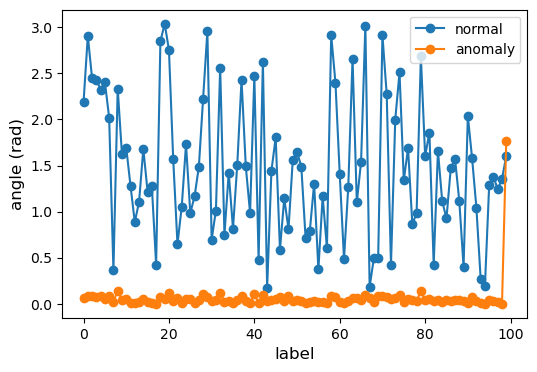

In [25]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(111)
np.random.seed(17)
normal_point = random.choice(normal_data)
anomaly_point = random.choice(anomaly_data)
normal_angles = eval_angle_point(normal_point, all_data) #рахуємо кути для нормальних точок
anomaly_angles = eval_angle_point(anomaly_point, all_data) #рахуємо кути для аномальних точок
ax2.plot(normal_angles[0:100],  marker="o", label='normal')
ax2.plot(anomaly_angles[0:100], marker="o", label='anomaly')
plt.xlabel('label', fontsize=12)
plt.ylabel('angle (rad)', fontsize=12)
plt.legend(loc='best')
plt.savefig('angle_based.png', dpi=600) # for use in the lecture
plt.show()

In [26]:
print('The normal point is {}'.format(normal_point))
print('The variance in angle for the normal point is {:.5f}'.format(np.var(normal_angles)))
print('The anomaly point is {}'.format(anomaly_point))
print('The variance in angle for the anomaly point is {:.5f}'.format(np.var(anomaly_angles)))

The normal point is [0.75424603 1.70316874]
The variance in angle for the normal point is 0.60509
The anomaly point is [4.52587824 8.91019027]
The variance in angle for the anomaly point is 0.45471


Це порівняння двох точок виглядає багатообіцяючим, але не є статистично значущим.

Давайте обчислимо дисперсію кута для всіх даних аномалії. Ми позначимо аномалії типом «0», щоб ми могли порівняти їх із нормальними даними (тип «1») нижче.

In [27]:
df_anomaly = pd.DataFrame(columns=['point','angle variance','type'])
for index, item in enumerate(anomaly_data):
    df_anomaly.loc[index] = [item, np.var(eval_angle_point(item, all_data)), 0]

Подивіться на перші десять записів.

In [28]:
df_anomaly.head(10)

,point,angle variance,type
0,"[7.066571495854759, 8.281551528370615]",0.239963,0
1,"[4.912232977610025, 8.944978801062241]",0.447247,0
2,"[5.618891639278701, 9.532065047272486]",0.224829,0
3,"[7.1614373367580715, 8.987418490481454]",0.091516,0
4,"[4.674205174076478, 7.397706178223456]",0.767388,0
5,"[5.586324770476369, 10.062306048806747]",0.092226,0
6,"[7.269879610663201, 7.966183826740902]",0.235928,0
7,"[6.098404325738117, 6.8499254027187835]",0.615849,0
8,"[4.525878242454957, 8.9101902697607]",0.454711,0
9,"[5.91594235166447, 6.4859511951762014]",0.719209,0


Це трохи бентежить. Дисперсія кута для багатьох аномалій є досить високою – вищою навіть за дисперсію нормальної точки, яку ми розглянули вище. Щоб завершити наш аналіз, нам також потрібна дисперсія для нормальних даних, яку ми обчислюємо нижче (позначаючи нормальні дані як тип «1»)

In [29]:
df_normal = pd.DataFrame(columns=['point','angle variance','type'])
for index2, item2 in enumerate(normal_data):
    df_normal.loc[index2] = [item2, np.var(eval_angle_point(item2, all_data)), 1]

In [30]:
df_normal.head(10)

,point,angle variance,type
0,"[1.057220407617929, 1.5166542526994613]",0.442425,1
1,"[0.7341458372525282, 2.020975505908734]",0.810849,1
2,"[0.44746989551628713, 1.8035059930728545]",0.326829,1
3,"[0.6024504585701147, 2.157769149062043]",0.629593,1
4,"[0.648088917734629, 2.0375500118982566]",0.701444,1
5,"[0.6615205158568662, 2.1560163153875744]",0.706020,1
6,"[0.6246069790039117, 1.6790219066107057]",0.432611,1
7,"[0.8468205401506654, 2.5959198435039514]",0.580395,1
8,"[0.8788440637281327, 1.5409260367027504]",0.419533,1
9,"[0.5169382272892247, 2.811148431089265]",0.377435,1


***Питання:*** Чому розрахунок для *normal_data* відносно повільний? (Підказка: яка складність алгоритму?)

***Відповідь:*** Складність алгоритму $O(N^{3})$, де $N$ - кількість точок.

Щоб побачити це, подумайте, як обчислюється кут. Вам потрібні три точки, і всі вони повинні бути різними. Існує $N$ способів вибрати першу точку, $N-1$ способів вибрати другу і $N-2$ способи вибрати третю. Помінявши другу та третю точки місцями, ви отримаєте той самий кут, тому загальна складність $N*(N-1)*(N-2)/2 = O(N^{3})$.

Зауважте, що тут ми розділили алгоритм на дві частини: *eval_angle_point* обчислює всі кути для даної точки [складність $O(N^{2})$], а потім останні цикли вище (для *df_anomaly* і *df_normal*) пройти по всіх точках [складність $O(N)$]

Перехід від 10 точок для аномалій до 100 точок для звичайних даних збільшує час роботи приблизно в $10^3=1000$, що призводить до помітного сповільнення. Як ми обговорювали на лекціях, є способи пришвидшити алгоритм, але навіть у модніших версіях виявлення аномалій на основі кутів відбувається повільно.

**Об’єднайте два датафреймів для аномалій і нормальних точок і відсортуйте їх у порядку зростання за дисперсією кута. Якщо наш алгоритм виявлення аномалій ідеальний, то всі перші десять записів мають бути аномаліями (тип 0).**

In [31]:
#df_all = df_anomaly.append(df_normal, ignore_index=True)
df_all = pd.concat([df_anomaly,df_normal], ignore_index=True)
df_all.sort_values(by=['angle variance']).head(10)
#print(df_all)

,point,angle variance,type
43,"[-0.007963240085042012, 1.6819486434208086]",0.085313,1
25,"[0.3717420163194104, 1.213654699499786]",0.091273,1
3,"[7.1614373367580715, 8.987418490481454]",0.091516,0
5,"[5.586324770476369, 10.062306048806747]",0.092226,0
2,"[5.618891639278701, 9.532065047272486]",0.224829,0
6,"[7.269879610663201, 7.966183826740902]",0.235928,0
0,"[7.066571495854759, 8.281551528370615]",0.239963,0
78,"[1.5633761101073278, 1.3905898245810073]",0.258711,1
90,"[0.29736034146994617, 2.4299459590107038]",0.268153,1
105,"[1.004238386524476, 1.4325277933330982]",0.310493,1


Ой! Ми знаходимо лише п'ять із десяти аномалій, а дві точки з найменшою дисперсією належать до нормальних даних. Зрозуміло, що наш алгоритм потребує доопрацювання. Ви покращите його у вправі 3.

Можна порівняти з https://medium.com/analytics-vidhya/anomaly-detection-using-angle-based-techniques-5d8db8500d14

# Розділ 3: Виявлення аномалій на основі глибини¶


У цьому розділі ми використовуємо визначення аномалій на основі глибини для виявлення аномалій у змодельованих двовимірних даних. Подібно до виявлення аномалій на основі кутів, виявлення аномалій на основі глибини для пошуку аномалій використовує геометричну структуру даних, а не основний розподіл ймовірностей.

Хоча зрозуміло, що ми маємо на увазі під кутом, необхідно визначити поняття глибини. Загальна ідея глибини полягає в присвоєнні числового значення кожній точці. Як і у випадку з дисперсією кута, точки нижче певного значення глибини вважаються аномаліями.

Тут ми приймемо глибину як глибину відшарування опуклої оболонки, як визначено нижче. (див. також тему 2 і http://www.cs.tufts.edu/r/geometry/pdf/alenex06-deptheexplorer.pdf)

Глибина точки X відносно набору даних S (що складається з багатьох точок, включаючи X) — це рівень опуклого шару, до якого належить X. Рівень опуклого шару визначається таким чином: точки на зовнішній опуклій оболонці S позначаються рівнем один, а точки на j-му рівні (з j додатним цілим числом) є точками на опуклій оболонці S після точок на усі попередні рівні видалено.

Використовуючи це визначення, ми виконуємо глибинне виявлення аномалії наступним чином:

1. Побудуйте опуклу оболонку для даних
2. Позначте точки на оболонці як глибину 1
3. Видаліть точки із  глибиною 1
4. Побудуйте опуклу оболонку для решти даних
5. Позначте точки на залі як глибина 2
6. Видаліть точки із  глибиною 2
7. Продовжуйте кроки (4-6), щоразу збільшуючи рівень глибини на один
8. Коли не залишиться достатньо точок для побудови опуклої оболонки, збільште глибину та позначте решту точок (якщо є) кінцевим значенням глибини та завершіть побудову опуклої оболонки
9. Аномалії - це ті точки, значення глибини яких нижче попередньо вибраного порогу

Враховуючи структуру алгоритму, ми розраховуємо реалізувати його рекурсивно.

#### Дані
Ми проілюструємо алгоритм за допомогою 2D-набору даних. Як ми згадували в лекції, глибина значно сповільнюється зі збільшенням розмірності. Ми будемо працювати з невеликим набором даних для наочності.

In [32]:
# Select 30 random points from a 2D uniform distribution between zero and one
np.random.seed(20)  #завантажує генератор
points = np.random.rand(30, 2)   #генерує масим 30х1 з двовимірними даними, тобто 30х2

Графік даних

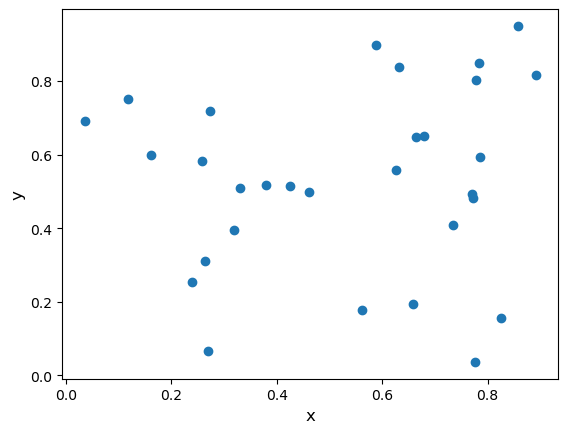

In [33]:
plt.plot(points[:, 0], points[:, 1], 'o')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

### Алгоритм
Побудуємо серію опуклих оболонок. Давайте подивимося на одну для всіх даних, який створює точки глибини 1.

Існує готова функція Python для побудови опуклої оболонки.

In [34]:
from scipy.spatial import ConvexHull
hull = ConvexHull(points) #функція побудови оболонки

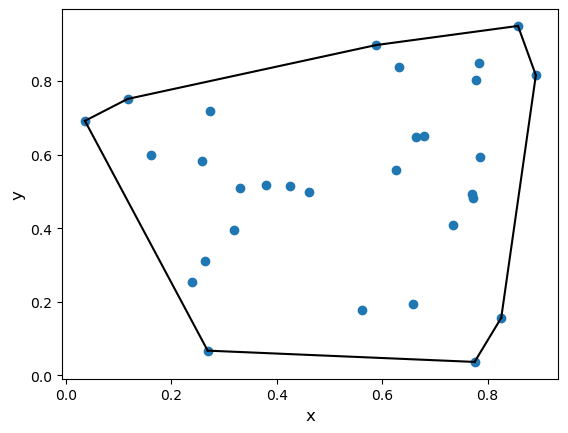

In [35]:
plt.plot(points[:, 0], points[:, 1], 'o')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
for simplex in hull.simplices:
    # In 2D, the simplicies are the lines connecting the points on the hull
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.show()

Тепер реалізуємо конструкцію рекурсивної опуклої оболонки.

In [36]:
# Функція *depth_calculator* приймає три входи:
# дані;
# словник, який заповнює *depth_calculator*
# з координатами кожної точки (ключ) і її відповідною глибиною (значення);
# лічильник для відстеження глибини. Його вихідним значенням є глибина зовнішньої оболонки

def depth_calculator(data, dict, count):
    next_data = []
    if len(data) < 3: # у 2D для створення опуклої оболонки потрібні принаймні три точки 
        for index, item in enumerate(data):
            dict[tuple(item)] = count # призначити глибину для решти точок
        print('Все зроблено! Для побудови опуклої оболонки потрібно не менше 3 точок. ')  # End
    else:
        hull = ConvexHull(data) # функція побудови оболонки
        for index, item in enumerate(data):
            if item in data[hull.vertices]:
                dict[tuple(item)] = count # призначити глибину точкам на оболонці
            else:
                dict[tuple(item)] = count + 1.0 # призначити depth+1 для точок не на оболонці
                next_data.append(item)
        new_data =np.asarray(next_data) # створити новий файл даних точок не на оболонці
        depth_calculator(new_data, dict, count + 1.0) # повторіть для нового файлу даних

In [37]:
depth_dict = {} # порожній словник для deep_calculator
depth_calculator(points, depth_dict, 1.0) # початкова оболонка має глибину 1,0

Все зроблено! Для побудови опуклої оболонки потрібно не менше 3 точок. 


#### Нанесіть точки з їх глибиною як анотацію

In [38]:
def depth_plot (dict):
    xs,ys = zip(*dict.keys())
    depth_label = list(dict.values())   
    plt.figure(figsize=(8,6))
    plt.title('Depth Labels', fontsize=20)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.scatter(xs, ys, marker = 'o',)
    for label, x, y in zip(depth_label, xs, ys):
        plt.annotate(label, xy = (x, y), xytext=(3,3), textcoords='offset points')

In [39]:
depth_plot(depth_dict)

Ви можете побачити на цьому графіку, що точки, позначені як «1.0», належать до початкової опуклої оболонки. Крім того, останні три точки (глибина 5,0) утворили трикутник, після якого не залишилося жодної точки, і алгоритм завершився.

Якщо припустити, що спочатку ми встановили поріг аномалії рівним 1,0, у нас буде вісім аномалій. Звичайно, у цьому випадку не було б потреби в рекурсивному підході - просто візьміть точки на самій зовнішній опуклій оболонці. Однак іноді глибина використовується як оцінка (міра того, наскільки аномальною є точка). У таких випадках корисно позначити всі точки.

### Вправа №1
Ця вправа відноситься до Розділу 1а, аналізу даних про озон із використанням підходу блокових максимумів.

A. Повторіть наведений вище аналіз, використовуючи місячний максимальний ряд (monthly maximum series - MMS) замість річного.

B. Чим ваші результати відрізняються від випадку AMS?

C. Які плюси та мінуси використання MMS порівняно з AMS?

### Рішення №1

In [43]:
year_grouper = pd.Grouper(freq='ME')  #групування за параметром "рік"
ams = ozone_aqi.groupby(year_grouper).max()  #пошук максимального значення в групах
print(ams)
print('')
print('Number of AMS entries is {}'.format(len(ams)))


            Ozone AQI Value
Date                       
1980-01-31               31
1980-02-29               31
1980-03-31              209
1980-04-30              161
1980-05-31              222
...                     ...
2017-08-31              122
2017-09-30              126
2017-10-31               50
2017-11-30               36
2017-12-31               36

[456 rows x 1 columns]

Number of AMS entries is 456


Це параметри форми 𝜉, розташування $\mu$ та масштабу $\sigma$ відповідно для GEV.

In [45]:
fit = ss.genextreme.fit(ams)
print(fit)

(np.float64(-0.3799753177691755), np.float64(73.59435631908137), np.float64(48.77164157425665))


Тут 𝜉 = -с= 0,3799 > 0. Маємо *важкий хвіст* в GEV distribution

Гістограма даних і графік підгонки

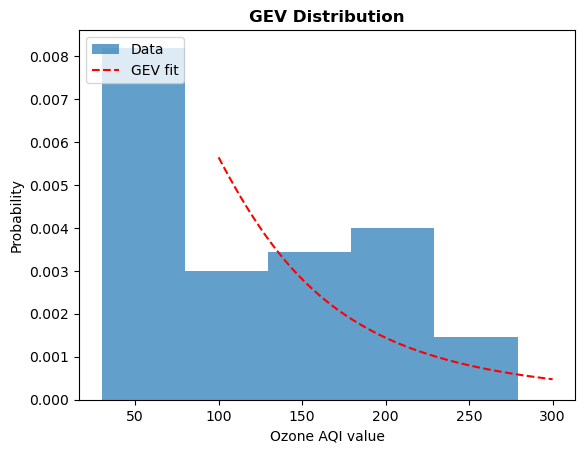

In [47]:
plt.hist(ams.iloc[:,0], bins=5, density=True, alpha=0.7, label='Data')
plt.plot(np.linspace(100, 300, 100),
         ss.genextreme.pdf(np.linspace(100, 300, 100), fit[0], fit[1], fit[2]), 'r--',
         label='GEV fit') 
plt.title('GEV Distribution', fontweight='bold')
plt.xlabel('Ozone AQI value')
plt.ylabel('Probability')
plt.legend(loc='upper left')
plt.show()

In [48]:
prob_over_200 = (1.0 - ss.genextreme.cdf(200, fit[0], fit[1], fit[2]))
print('{:.2f}'.format(prob_over_200))

0.15


     Отже, ймовірність перевищення AQI 200 у певному місяці 0.15 (це краще, ніж 0,75)

In [50]:
boundary = ss.genextreme.ppf(0.99, fit[0], fit[1], fit[2])
print(f'The one precent threshold ozone AQI level is {boundary:6.4f}')

The one precent threshold ozone AQI level is 682.3526


 перевищення AQI озону в один відсоток (з ймовірністю 0,01) у певний місяць становить 682.

### Вправа №2

Ця вправа відноситься до Розділу 2 (виявлення аномалії за кутом).

A. Змініть обчислення кута так, щоб він обчислював змінений кут між двома векторами $\bf{a}$ і $\bf{b}$, як обговорювалося в лекціях:

\begin{equation}
\theta_{\rm mod} = \frac{\bf{a} \dot \bf{b}}{a^{2}b^{2}}
\end{equation}

де $a$ і $b$ — абсолютні значення $\bf{a}$ і $\bf{b}$ відповідно.

B. Повторіть виявлення аномалії, використовуючи змінений кут. Цей алгоритм працює краще?

C. Чи змінилася складність алгоритму? Якщо так, то в чому полягає нова складність?

### Рішення №2

In [51]:
def angle(point1, point2, point3): 
    v21 = np.subtract(point2, point1)  
    v31 = np.subtract(point3, point1)  
    
    dot_product = np.dot(v21, v31) 
    norm_v21 = np.linalg.norm(v21) 
    norm_v31 = np.linalg.norm(v31) 
    
    modified_theta = dot_product / (norm_v21**2 * norm_v31**2) 
    
    return modified_theta

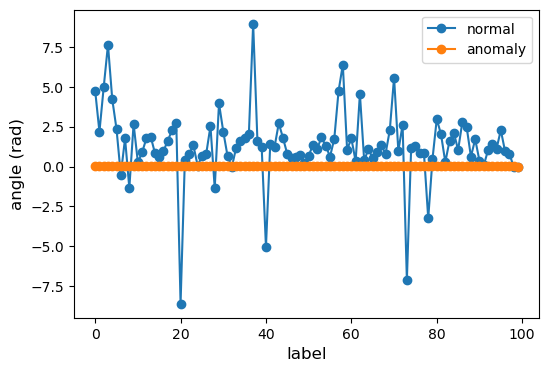

The normal point is [0.51998426 2.12699696]
The variance in angle for the normal point is 30.52746
The anomaly point is [4.91223298 8.9449788 ]
The variance in angle for the anomaly point is 0.00324


In [53]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(111)
np.random.seed(17)
normal_point = random.choice(normal_data)
anomaly_point = random.choice(anomaly_data)
normal_angles = eval_angle_point(normal_point, all_data) #рахуємо кути для нормальних точок
anomaly_angles = eval_angle_point(anomaly_point, all_data) #рахуємо кути для аномальних точок
ax2.plot(normal_angles[0:100],  marker="o", label='normal')
ax2.plot(anomaly_angles[0:100], marker="o", label='anomaly')
plt.xlabel('label', fontsize=12)
plt.ylabel('angle (rad)', fontsize=12)
plt.legend(loc='best')
plt.savefig('angle_based.png', dpi=600) # for use in the lecture
plt.show()
print('The normal point is {}'.format(normal_point))
print('The variance in angle for the normal point is {:.5f}'.format(np.var(normal_angles)))
print('The anomaly point is {}'.format(anomaly_point))
print('The variance in angle for the anomaly point is {:.5f}'.format(np.var(anomaly_angles)))

In [54]:
df_anomaly = pd.DataFrame(columns=['point', 'angle variance', 'type'])
for index, item in enumerate(anomaly_data):
    df_anomaly.loc[index] = [item, np.var(eval_angle_point(item, all_data)), 0]

df_anomaly.head(10)

,point,angle variance,type
0,"[7.066571495854759, 8.281551528370615]",0.003074,0
1,"[4.912232977610025, 8.944978801062241]",0.003241,0
2,"[5.618891639278701, 9.532065047272486]",0.001941,0
3,"[7.1614373367580715, 8.987418490481454]",0.000860,0
4,"[4.674205174076478, 7.397706178223456]",0.000973,0
5,"[5.586324770476369, 10.062306048806747]",0.001335,0
6,"[7.269879610663201, 7.966183826740902]",0.001994,0
7,"[6.098404325738117, 6.8499254027187835]",0.003482,0
8,"[4.525878242454957, 8.9101902697607]",0.002467,0
9,"[5.91594235166447, 6.4859511951762014]",0.003588,0


In [55]:
df_all = pd.concat([df_anomaly,df_normal], ignore_index=True)
df_all.sort_values(by=['angle variance']).head(10)

,point,angle variance,type
3,"[7.1614373367580715, 8.987418490481454]",0.000860,0
4,"[4.674205174076478, 7.397706178223456]",0.000973,0
5,"[5.586324770476369, 10.062306048806747]",0.001335,0
2,"[5.618891639278701, 9.532065047272486]",0.001941,0
6,"[7.269879610663201, 7.966183826740902]",0.001994,0
8,"[4.525878242454957, 8.9101902697607]",0.002467,0
0,"[7.066571495854759, 8.281551528370615]",0.003074,0
1,"[4.912232977610025, 8.944978801062241]",0.003241,0
7,"[6.098404325738117, 6.8499254027187835]",0.003482,0
9,"[5.91594235166447, 6.4859511951762014]",0.003588,0


### Вправа №3
Ця вправа відноситься до розділу 3 (виявлення аномалій на основі глибини).

A. Застосуйте алгоритм виявлення аномалії на основі глибини до даних у розділі 2.

B. Наскільки успішним є алгоритм виявлення аномалій?

C. Як ваші результати порівнюються з алгоритмами виявлення аномалій на основі кута (обидві версії)?

### Рішення №3

In [41]:
# YOUR CODE HERE